<a href="https://colab.research.google.com/github/rupeshrgarje/BootCamp2/blob/main/Time_Series_Coding_Path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the libraries

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.9 MB/s eta 0:00:00


In [2]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# Importing necesssary libraries

In [1]:
import pandas as pd
import numpy as np

# Read Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Time_Series/AirPassengers.csv", index_col="Month", parse_dates=True)

In [3]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Summarize the data

In [4]:
df.shape

(144, 1)

In [5]:
df.dtypes

,0
#Passengers,int64


# Performing EDA

In [7]:
df.isnull().sum()

,0
#Passengers,0


# Plot your data

<Axes: xlabel='Month'>

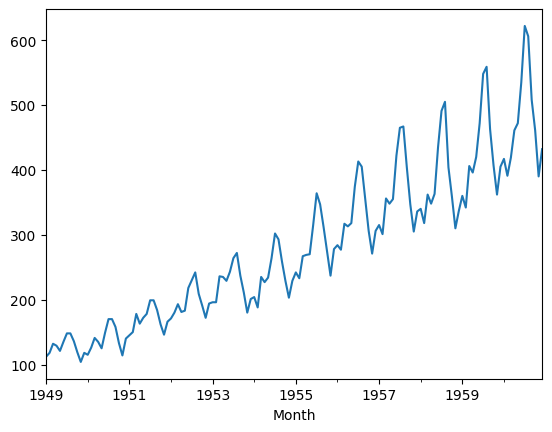

In [10]:
df['#Passengers'].plot()

# Figureout the order for ARIMA model

In [11]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['#Passengers'], suppress_warnings=True)
stepwise_fit.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 09 Jul 2025   AIC                           1365.825
Time:                        15:18:24   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1717     85.615      8.458      0.000     556.369     891.975
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Loading ARIMA model

In [12]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [13]:
print(df.shape)

(144, 1)


In [15]:
df.head(13)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [16]:
train = df.iloc[:-12]

In [17]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [18]:
test = df.iloc[-12:]

In [19]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [20]:
print(train.shape,test.shape)

(132, 1) (12, 1)


# Train the model

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model = ARIMA(train['#Passengers'], order=(4, 1, 3))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -607.206
Date:                Wed, 09 Jul 2025   AIC                           1230.412
Time:                        15:50:06   BIC                           1253.414
Sample:                    01-01-1949   HQIC                          1239.759
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5693      0.115     -4.968      0.000      -0.794      -0.345
ar.L2          0.4828      0.123      3.935      0.000       0.242       0.723
ar.L3          0.1164      0.128      0.911      0.362      -0.134       0.367
ar.L4         -0.5331      0.084     -6.378      0.000      -0.697      -0.369
ma.L1          0.9304      0.103      8.994      0.000       0.728       1.133
ma.L2         -0.5541      0.151     -3.670      0.000      -0.850      -0.258
ma.L3         -0.7290      0.102     -7.155      0.000      -0.929      -0.529
sigma2       607.4737     76.263      7.965      0.000     458.000     756.947
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                11.03
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.40   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Predictions on Test Set

In [25]:
start = len(train)

In [26]:
end = len(train) + len(test) - 1

In [27]:
start, end

(132, 143)

In [29]:
pred = model.predict(start=start, end=end)

In [30]:
pred

,predicted_mean
1960-01-01,441.014226
1960-02-01,446.034149
1960-03-01,469.988824
1960-04-01,440.043189
1960-05-01,450.040043
1960-06-01,430.002111
1960-07-01,429.978879
1960-08-01,437.445809
1960-09-01,425.521789
1960-10-01,446.595405


In [31]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


<Axes: xlabel='Month'>

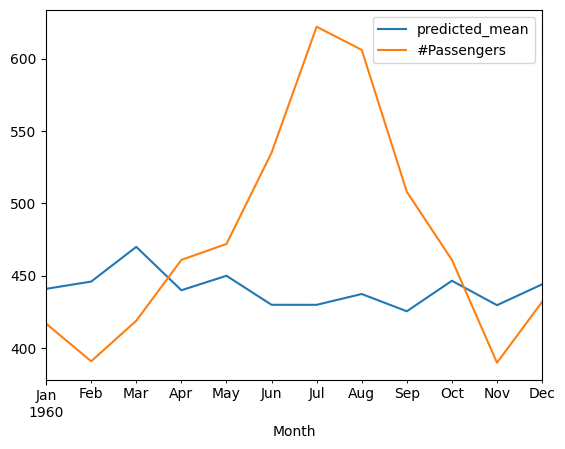

In [35]:
pred.plot(legend = 'Model_prediction')
test['#Passengers'].plot(legend = True)

# Finding the model accuracy

In [36]:
test['#Passengers'].mean()

476.1666666666667

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
from math import sqrt

In [39]:
rmse = sqrt(mean_squared_error(pred, test['#Passengers']))

In [40]:
print('Root Mean Square Error:',rmse)

Root Mean Square Error: 87.63999545188254


# For Future Dates

In [41]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [42]:
index_future_dates = pd.date_range(start='1961-01-01',end='1961-12-01',freq='MS')

In [43]:
index_future_dates

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [44]:
len(df)

144

In [45]:
len(df)+12-1

155

In [46]:
model.predict(start=len(df),end=len(df)+12-1)

,predicted_mean
1961-01-01,436.594050
1961-02-01,434.645531
1961-03-01,442.786794
1961-04-01,428.650601
1961-05-01,444.421928
1961-06-01,430.604834
1961-07-01,440.099551
1961-08-01,437.395466
1961-09-01,433.502589
1961-10-01,442.884667


<Axes: >

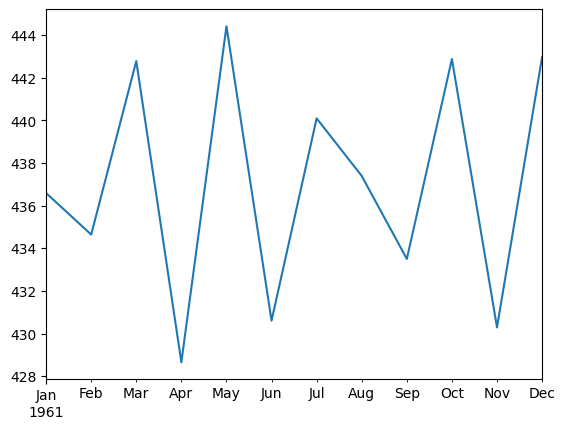

In [47]:
model.predict(start=len(df),end=len(df)+12-1).plot() # Future Prediction